# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [ждем контеста] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
from plotly.colors import qualitative
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

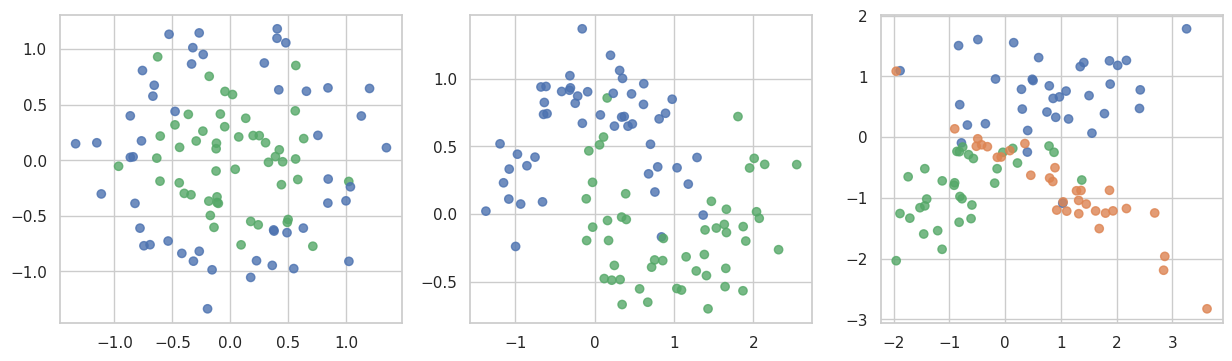

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [7]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Датасет 1:
Accuracy на train = 1.00
Accuracy на test = 0.73


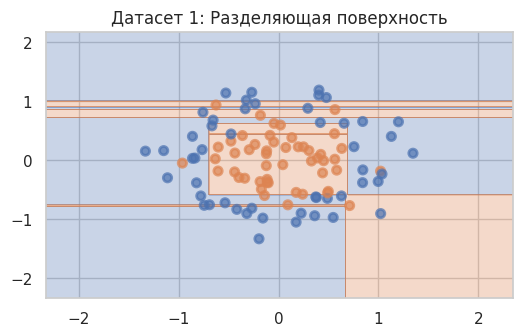

Датасет 2:
Accuracy на train = 1.00
Accuracy на test = 0.87


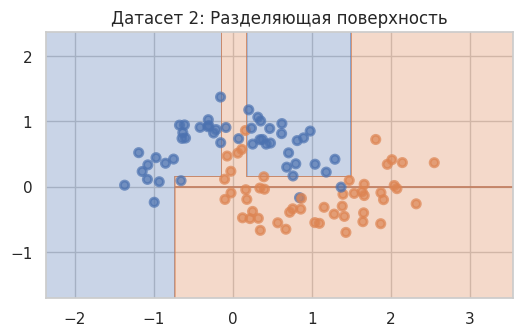

Датасет 3:
Accuracy на train = 1.00
Accuracy на test = 0.83


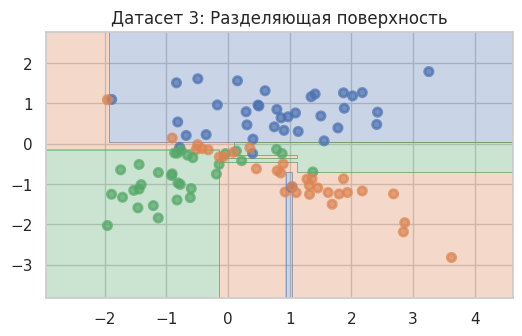

In [9]:
for i, (X, y) in enumerate(datasets, start=1):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f"Датасет {i}:")
    print(f"Accuracy на train = {accuracy_train:.2f}")
    print(f"Accuracy на test = {accuracy_test:.2f}")

    plt.figure(figsize=(6, 4))
    plt.title(f"Датасет {i}: Разделяющая поверхность")
    plot_surface(clf, X, y)
    plt.show()

__Ответ:__ Как можно наблюдать на графиках, разделяющие границы дерева решений стали чрезмерно сложными и «извиваются» вокруг отдельных точек. Иными словами, модель не просто выделяет общие закономерности, а как бы «запоминает» конкретные примеры из обучающей выборки. Это является явным признаком переобучения: модель перестаёт хорошо обобщать знания и начинает подгонять свои решения под конкретные данные, что может ухудшить её способность корректно работать с новыми примерами.

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки.

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

In [23]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

max_depth_values = [3, 5, None]
min_samples_leaf_values = [15, 5, 1]

def get_decision_surface(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z, x_min, x_max, y_min, y_max

for dataset_name, (X, y) in datasets:
    unique_classes = np.unique(y)
    num_classes = len(unique_classes)
    palette = qualitative.Plotly[:num_classes]
    cmap = ListedColormap(palette)

    frames = []
    sliders_steps = []

    best_acc = -1
    best_params = None

    for md in max_depth_values:
        for msl in min_samples_leaf_values:

            clf = DecisionTreeClassifier(max_depth=md, min_samples_leaf=msl, random_state=42)
            accuracy = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')
            mean_acc = np.mean(accuracy)

            if mean_acc > best_acc:
                best_acc = mean_acc
                best_params = (md, msl)

            clf.fit(X, y)
            xx, yy, Z, x_min, x_max, y_min, y_max = get_decision_surface(clf, X, y)

            contour = go.Contour(
                x=xx[0, :],
                y=yy[:, 0],
                z=Z,
                colorscale=[(i/(num_classes-1), palette[i]) for i in range(num_classes)],
                opacity=0.3,
                showscale=False,
                contours_coloring='fill'
            )

            scatter = go.Scatter(
                x=X[:, 0],
                y=X[:, 1],
                mode='markers',
                marker=dict(
                    color=[palette[c] for c in y],
                    line=dict(width=1, color='black'),
                    size=8
                ),
                name='Data points'
            )

            title_text = f"max_depth={md}, min_leaf={msl}, acc={mean_acc:.2f}"
            frame = go.Frame(
                data=[contour, scatter],
                name=title_text
            )
            frames.append(frame)

            step = dict(
                method="animate",
                args=[[title_text],
                      {"mode": "immediate", "frame": {"duration": 300, "redraw": True}, "transition": {"duration": 0}}],
                label=title_text
            )
            sliders_steps.append(step)

    initial_frame = frames[0]
    fig = go.Figure(
        data=initial_frame.data,
        layout=go.Layout(
            title=dataset_name,
            xaxis=dict(range=[X[:,0].min()-1, X[:,0].max()+1]),
            yaxis=dict(range=[X[:,1].min()-1, X[:,1].max()+1])
        ),
        frames=frames[1:]
    )

    sliders = [dict(
        steps=sliders_steps,
        active=0,
        transition=dict(duration=0),
        x=0.1,
        y=0,
        xanchor="left",
        yanchor="top",
        currentvalue={"prefix": "Params: "}
    )]

    fig.update_layout(
        updatemenus=[dict(
            type="buttons",
            direction="left",
            buttons=[dict(label="Play", method="animate",
                          args=[None, {"frame": {"duration":500, "redraw": True},
                                       "fromcurrent":True,
                                       "transition":{"duration":300}}])],
            pad={"r":10, "t":10},
            showactive=True,
            x=0.1,
            y=-0.1,
            xanchor="right",
            yanchor="top"
        )],
        sliders=sliders
    )

    fig.show()

    print("-----------------------------------------------------------------------------------")
    print(f"Для датасета '{dataset_name}' наилучшая точность: {best_acc:.3f}, при параметрах max_depth={best_params[0]}, min_samples_leaf={best_params[1]}")
    print("-----------------------------------------------------------------------------------")


-----------------------------------------------------------------------------------
Для датасета 'Circles' наилучшая точность: 0.840, при параметрах max_depth=5, min_samples_leaf=5
-----------------------------------------------------------------------------------


-----------------------------------------------------------------------------------
Для датасета 'Moons' наилучшая точность: 0.890, при параметрах max_depth=3, min_samples_leaf=1
-----------------------------------------------------------------------------------


-----------------------------------------------------------------------------------
Для датасета 'Classification' наилучшая точность: 0.830, при параметрах max_depth=3, min_samples_leaf=15
-----------------------------------------------------------------------------------


__Ответ:__ На всех трёх датасетах оптимальные параметры глубины дерева и количества объектов в листе, обеспечивающие наибольшую accuracy, различаются. Это можно объяснить тем, что каждый набор данных имеет собственную структуру и распределение признаков, что приводит к разным условиям для эффективного обучения.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [1]:
!wget https://raw.githubusercontent.com/esokolov/ml-course-hse/refs/heads/master/2024-fall/homework-practice/homework-practice-05-trees/hw5code.py

--2024-12-07 06:15:19--  https://raw.githubusercontent.com/esokolov/ml-course-hse/refs/heads/master/2024-fall/homework-practice/homework-practice-05-trees/hw5code.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5980 (5.8K) [text/plain]
Saving to: ‘hw5code.py’

hw5code.py          100%[===================>]   5.84K  --.-KB/s    in 0s      

2024-12-07 06:15:20 (59.1 MB/s) - ‘hw5code.py’ saved [5980/5980]



In [19]:
import hw5code

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [26]:
url = 'https://raw.githubusercontent.com/esokolov/ml-course-hse/refs/heads/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv'
df = pd.read_csv(url)
df.head(5)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


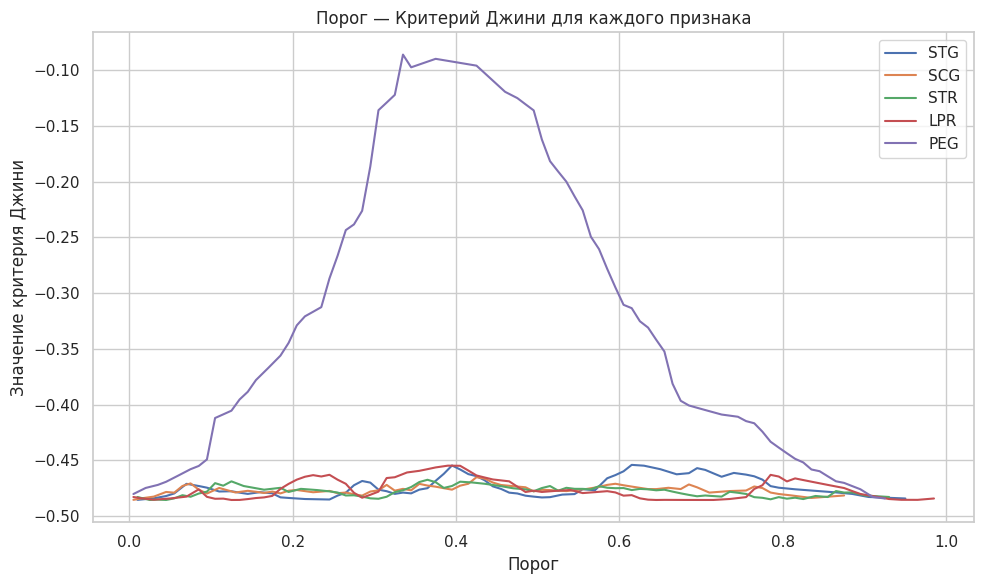

In [35]:
X = df.iloc[:, :5].values
y = df.iloc[:, 5].values

feature_names = df.columns[:5]

plt.figure(figsize=(10, 6))
for i in range(5):
    feature_vector = X[:, i]
    thresholds, ginis, threshold_best, gini_best = hw5code.find_best_split(feature_vector, y)
    plt.plot(thresholds, ginis, label=feature_names[i])
plt.xlabel('Порог')
plt.ylabel('Значение критерия Джини')
plt.title('Порог — Критерий Джини для каждого признака')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

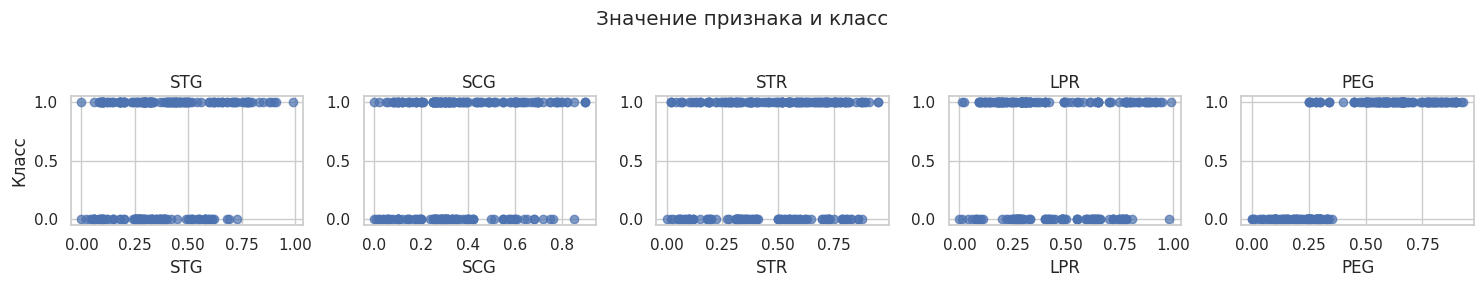

In [36]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.scatter(X[:, i], y, alpha=0.7)
    ax.set_xlabel(feature_names[i])
    if i == 0:
        ax.set_ylabel('Класс')
    ax.set_title(feature_names[i])
fig.suptitle('Значение признака и класс')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** По признаку PEG стоит производить деление выборки на два поддерева, так как его кривая значительно отклоняется от кривых других признаков. Это указывает на то, что данный признак имеет наибольшую корреляцию с целевой переменной и, следовательно, является наиболее информативным. Скатер-плоты подтверждают значимость этого признака, поскольку его значения позволяют явно разделить данные на два класса.

Кривая Джини для признака, который идеально делит выборку, будет характеризоваться наличием глубокого провала, где коэффициент Джини будет практически равен нулю, что наблюдается в узком диапазоне порогов. На остальных порогах значения критерия Джини будут заметно выше.

Для признаков, по которым деление практически невозможно, кривая будет иметь плоский вид с высокими значениями критерия Джини и отсутствием явных экстремумов.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

mushroom = fetch_ucirepo(id=73)

X = mushroom.data.features
y = mushroom.data.targets

In [5]:
from hw5code import DecisionTree
X_encoded = X.apply(lambda col: LabelEncoder().fit_transform(col))

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

feature_types = ["categorical"] * X_encoded.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X_encoded.values, y_encoded,
                                                    test_size=0.5,
                                                    random_state=42,
                                                    stratify=y_encoded)
tree = DecisionTree(feature_types)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy on the mushroom dataset:", acc)

Accuracy on the mushroom dataset: 1.0


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe.

In [4]:
from hw5code import DecisionTree

In [3]:
url = 'https://raw.githubusercontent.com/esokolov/ml-course-hse/refs/heads/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv'
df_dtc = pd.read_csv(url)
df_dtc.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [6]:
features = df_dtc.iloc[:, :-1]
target = df_dtc.iloc[:, -1]

features_encoded = features.apply(lambda col: LabelEncoder().fit_transform(col))
target_encoded = LabelEncoder().fit_transform(target)

feature_types = ["categorical"] * features_encoded.shape[1]

X_train, X_test, y_train, y_test = train_test_split(features_encoded.values,
                                                    target_encoded,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=target_encoded)

min_samples_split_values = [2, 10, 50]
max_depth_values = [3, 5, None]
min_samples_leaf_values = [1, 5, 15]

results = []
best_acc = -1
best_params = None

for md in max_depth_values:
    for mss in min_samples_split_values:
        for msl in min_samples_leaf_values:
            tree = DecisionTree(feature_types=feature_types, max_depth=md, min_samples_split=mss, min_samples_leaf=msl)
            tree.fit(X_train, y_train)
            y_pred = tree.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results.append((md, mss, msl, acc))
            if acc > best_acc:
                best_acc = acc
                best_params = (md, mss, msl)

print("Лучшие параметры:", best_params, "с точностью:", best_acc)

Лучшие параметры: (None, 10, 1) с точностью: 0.8263888888888888


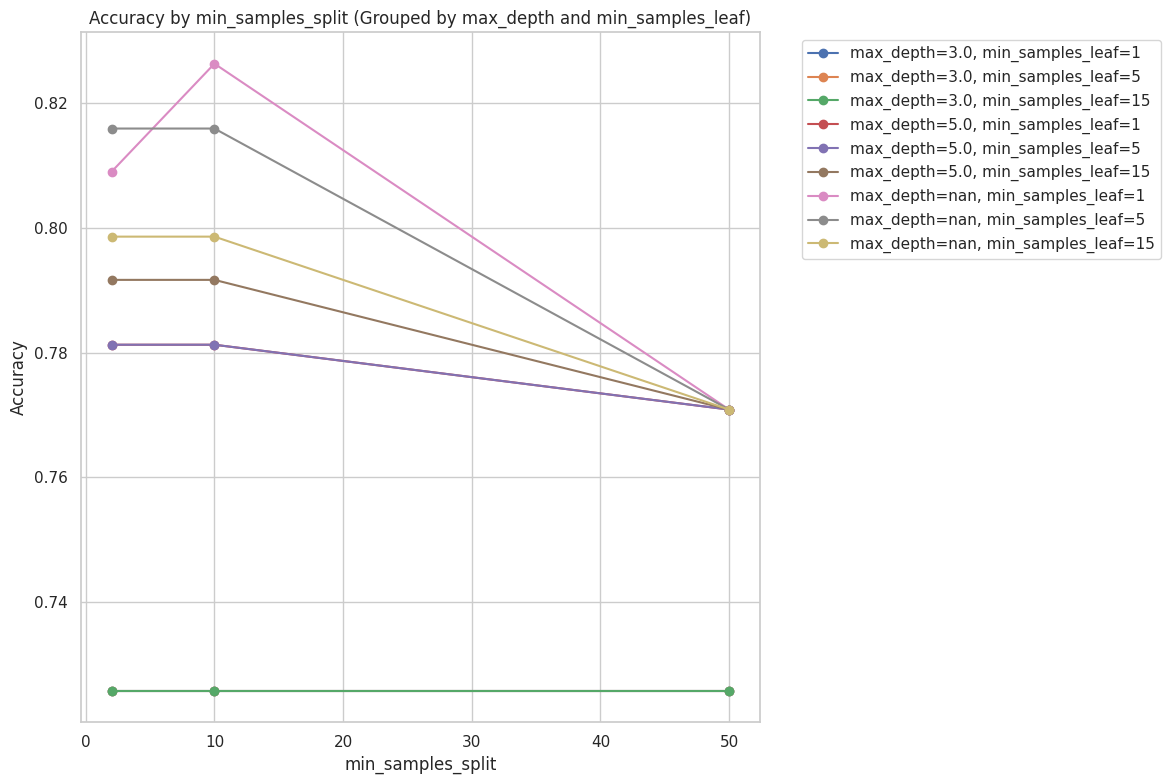

In [7]:
results_df = pd.DataFrame(results, columns=["max_depth", "min_samples_split", "min_samples_leaf", "accuracy"])
results_df["max_depth"] = results_df["max_depth"].apply(lambda x: str(x))

plt.figure(figsize=(12, 8))
for depth in results_df["max_depth"].unique():
    for leaf in results_df["min_samples_leaf"].unique():
        subset = results_df[(results_df["max_depth"] == depth) & (results_df["min_samples_leaf"] == leaf)]
        if not subset.empty:
            plt.plot(subset["min_samples_split"], subset["accuracy"], marker="o", label=f"max_depth={depth}, min_samples_leaf={leaf}")

plt.title("Accuracy by min_samples_split (Grouped by max_depth and min_samples_leaf)")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Итерируетесь по всем порогам
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [1]:
from hw5code import LinearRegressionTree

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
data = fetch_california_housing()
features = data.data
target = data.target

In [8]:
feature_types = ["real"] * features.shape[1]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

min_samples_split_values = [2, 10, 50]
max_depth_values = [3, 5, None]
min_samples_leaf_values = [1, 5, 15]

best_mse = float('inf')
best_params = None

for md in max_depth_values:
    for mss in min_samples_split_values:
        for msl in min_samples_leaf_values:
            tree = LinearRegressionTree(feature_types=feature_types, max_depth=md, min_samples_split=mss, min_samples_leaf=msl)
            tree.fit(X_train, y_train)
            y_pred = tree.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)

            if mse < best_mse:
                best_mse = mse
                best_params = (md, mss, msl)

print("Лучшая MSE на валидации:", best_mse)
print("Лучшие параметры: max_depth={}, min_samples_split={}, min_samples_leaf={}".format(*best_params))

Лучшая MSE на валидации: 0.30073668990938784
Лучшие параметры: max_depth=None, min_samples_split=50, min_samples_leaf=15


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [14]:
results = []
best_result = {"mse": float('inf'), "max_depth": None, "min_samples_split": None, "min_samples_leaf": None}

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:

            model = DecisionTreeRegressor(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )

            mse = -np.mean(cross_val_score(model, features, target, scoring='neg_mean_squared_error', cv=5))
            results.append((max_depth, min_samples_split, min_samples_leaf, mse))

            if mse < best_result["mse"]:
                best_result["mse"] = mse
                best_result["max_depth"] = max_depth
                best_result["min_samples_split"] = min_samples_split
                best_result["min_samples_leaf"] = min_samples_leaf

print("Лучшие гиперпараметры:")
print(f"max_depth: {best_result['max_depth']}")
print(f"min_samples_split: {best_result['min_samples_split']}")
print(f"min_samples_leaf: {best_result['min_samples_leaf']}")
print(f"MSE: {best_result['mse']:.4f}")

Лучшие гиперпараметры:
max_depth: None
min_samples_split: 50
min_samples_leaf: 15
MSE: 0.5570


Моё дерево и дерево из стандартного пакета имеют одинаковые гиперпараметры. Однако, результаты продемонстрировали, что моя реализация обеспечивает лучшее качество, так как значение MSE оказалось ниже.

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

-----------------------------------------------------------------------------------
MSE на тестовой выборке: 0.0119
-----------------------------------------------------------------------------------


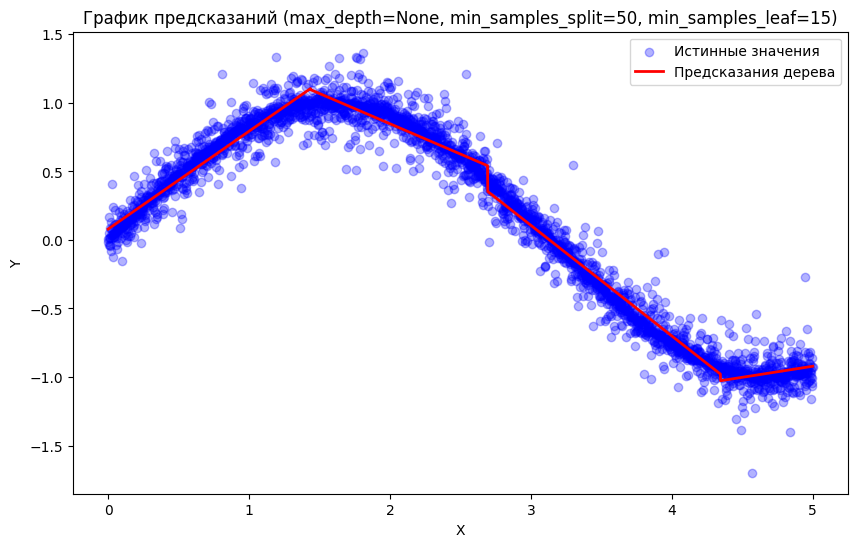

In [19]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

tree = LinearRegressionTree(feature_types=feature_types, max_depth=None, min_samples_split=50, min_samples_leaf=15)
tree.fit(x_train, y_train)

y_pred_test = tree.predict(x_test)
test_mse = mean_squared_error(y_test, y_pred_test)

y_pred_all = tree.predict(x)

print("-----------------------------------------------------------------------------------")
print(f"MSE на тестовой выборке: {test_mse:.4f}")
print("-----------------------------------------------------------------------------------")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.3, label="Истинные значения")
plt.plot(x, y_pred_all, color='red', linewidth=2, label="Предсказания дерева")
plt.title(f"График предсказаний (max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf})")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

-----------------------------------------------------------------------------------
MSE на тестовой выборке: 0.0337
-----------------------------------------------------------------------------------


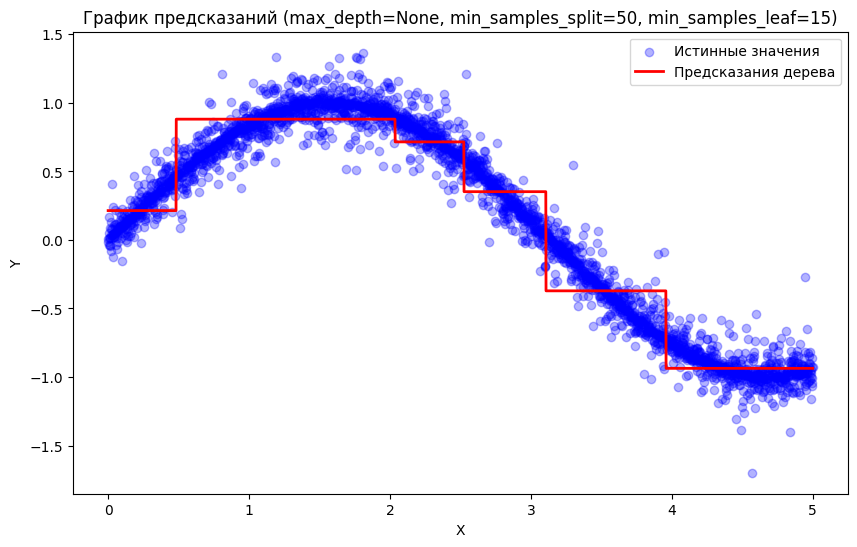

In [20]:
tree = DecisionTreeRegressor(max_depth=None, min_samples_split=50, min_samples_leaf=15, random_state = 42)
tree.fit(x_train, y_train)

y_pred_test = tree.predict(x_test)
test_mse = mean_squared_error(y_test, y_pred_test)

y_pred_all = tree.predict(x)

print("-----------------------------------------------------------------------------------")
print(f"MSE на тестовой выборке: {test_mse:.4f}")
print("-----------------------------------------------------------------------------------")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.3, label="Истинные значения")
plt.plot(x, y_pred_all, color='red', linewidth=2, label="Предсказания дерева")
plt.title(f"График предсказаний (max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf})")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

**Ответ:** Реализованное дерево имеет более гибкий подход к моделированию: вместо усреднения в листьях используются линейные модели, это позволяет лучше учитывать сложные зависимости в данных. Применение квантильных порогов для разбиений способствует адаптации к различным распределениям признаков и тем самым улучшает сегментацию данных. Можно также попробовать улучшить модель, заменив простую линейную регрессию в листьях на Ridge или Lasso, чтобы повысить устойчивость к переобучению.

Однако такая гибкость увеличивает вычислительную нагрузку. Оценка квантильных порогов и обучение линейных моделей для каждого разбиения требуют больше времени, особенно при больших объемах данных или большом числе признаков. Это усложняет отладку и делает модель менее практичной для оперативных задач, особенно в условиях ограниченных вычислительных ресурсов.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

![текст](https://datasciencedojo.com/wp-content/uploads/52.jpg)